# Исследование закономерностей успешности компьютерных игр

<br></br>
<b>Описание проекта:</b>
<br>Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры.</br> 
<br>Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br>Представлены данные до 2016 года. Гипотетически, необходимо запланировать кампанию на 2017-й. Нужно отработать принцип работы с данными. 
<br></br>
<br> В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». </br>

Описание данных


Name — название игры
<br>Platform — платформа</br>
<br>Year_of_Release — год выпуска</br>
<br>Genre — жанр игры</br>
<br>NA_sales — продажи в Северной Америке (миллионы долларов)</br>
<br>EU_sales — продажи в Европе (миллионы долларов)</br>
<br>JP_sales — продажи в Японии (миллионы долларов)</br>
<br>Other_sales — продажи в других странах (миллионы долларов)</br>
<br>Critic_Score — оценка критиков (максимум 100)</br>
<br>User_Score — оценка пользователей (максимум 10)</br>
<br>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Открытие файла и изучение общей информации. 

#### Открытие и изучение файла

In [2]:
#импортируем необходимые библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy import stats as st

In [3]:
data = pd.read_csv('/datasets/games.csv') #загружаем данные из файла в датафрейм
data.head(5) # выводим первые 5 строк датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Видно, что датафрейм состоит из 11 столбцов с названиями, некоторые символы которых используют верхний регистр. На этапе предобработки необходимо заменить регистр на нижний. 
<br> Наблюдаются пропуски в данных в столбцах оценок критиков, юзеров и возрастного рейтинга </br>

In [4]:
data.info() # общая информация о data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исходя из данных, видно, что в датафрейме 16715 строк. Большое количество пропущенных значений в столбцах Critic_score, User_Score, Rating. 
<br> Наблюдаются неправильные типы данных у столбцов Year_of_Release, Critic_Score, User_Score.  </br>


#### Построение общих гистрограмм

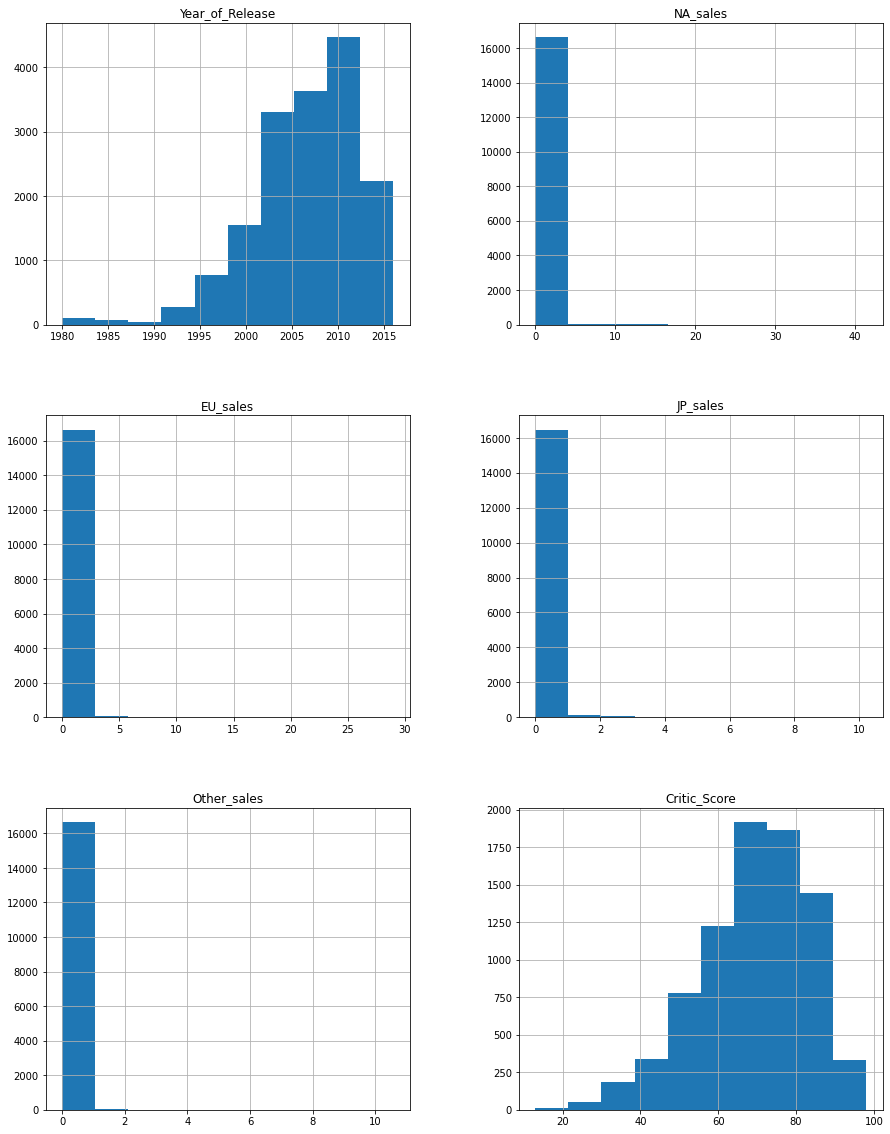

In [5]:
data.hist(figsize=(15, 20)) # построим общую гистограмму для всех числовых значений датафрейма
plt.show()

По гистограммам видно, что большинство игр, дата релиза у которых с ~2009 по ~2012 гг.
<br> Больше всего продаж у региона Северная Америка</br>
<br> Меньше всего у региона "другие"</br>
<br> Оценки критиков распределены вправо, т.е. в большинстве случаев имеют значения от 50 до 100 баллов</br>

#### Вывод

В целом, датасет представлен корректно. За исключением большого количества пропусков в столбцах с отзывами и оценками.
Названия столбцов имеют верхний регистр. Необходимо привести все буквы к нижнему. 
<br> Продажи в разных регионаах распределены приблизительно равномерно </br>
<br> Оценки критиков распределены вправо</br>

### Предобработка данных

Отметим названия столбцов. Они представлены в неудобном формате. Необходимо привести все символы в нижний регистр.
        <br>В датасете отметим большое количество пропущенных значений в столбцах Critic_score, User_Score, Rating. Причин пропусков может быть множество: изначально не было опроса с оценкой игры, не была найдена информация в открытых источниках, игра не популярна и у неё не присвоен рейтинг. </br>
<br>Также, есть пропуски в столбцах Year_of_Release, Name и Genre. В данном случае пропуски могли означать отсутствие информации о дате релиза игры(в виду её непопулярности), не найдена объективная информация о дате релиза и т.п. В столбцах Year и Genre всего 2 пропуска. Они, вероятно, вызваны ошибкой в сборе данных, человеческим фактором. Данные пропуски можно удалить, т.к. это не повлияет на общую картину датасета.</br> В столбце Year_of_Release заполнить пропуски не представляется возможным без использования сторонних ресурсов. 
<br> В столбцах critic_score и user_score необходимо оставить пропуски как есть, т.к. невозможно точно подобрать объективные значения без искажения информации.В столбце rating пустые значения необходимо заполнить "заглушкой", т.к. в будущем  игры без рейтинга будут выпадать из анализа </br>
<br> В столбце user_score присутствует аббревиатура tbd, она означает отсутствие информации (to be determined), в данном случае можно заменить на пропущенное значение (NaN). </br>
        <br> Наблюдаются неправильные типы данных у столбцов Year_of_Release, Critic_Score, User_Score. В столбце year_of_release указан тип данных float64, необходимо привести к типу int64, т.к. в столбце указан только год выпуска числом </br> <br> В столбце critic_score тип данных float64, необходимо привести к типу int64, т.к. диапазон значений составляет от 0 до 100, без дробных частей. </br>
        <br> В столбце user_score указан тип данных object, необходимо привести к типу данных float64, т.к. диапазон данных от 0 до 10 с дробными частями.

#### Замена названий столбцов

In [6]:
data.columns = data.columns.str.lower() # приводим названия столбцов к нижнему регистру
data.columns # выводим на экран

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Изменение типов данных

Приведем значения в столбце year_of_release к типу int64, т.к. в столбце указан только год выпуска числом

In [7]:
data['year_of_release'].unique() # вывод уникальных значений на экран

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [8]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Приведем значения в столбце critic_score к типу int64, т.к. в столбце указаны только числа от 0 до 100

In [9]:
data['critic_score'].unique() # вывод уникальных значений на экран

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [10]:
data['critic_score'] = data['critic_score'].astype('Int64')

Приведем значения в столбце user_score к типу float64, т.к. в столбце встречаются дробные значения в промежутке между 0 и 10
<br> Выведем уникальные значения на экран </br>

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце встречаются уникальные значение 'tbd' с типом текст. 
<br> Выведем строки с данными значениями </br>

In [12]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,<NA>,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,<NA>,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,<NA>,tbd,E


Никаких особенных закономерностей зафиксировать не удалось.
<br> Заменим все tbd в данном столбце на NaN (пустые значения)</br>

In [13]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan # замена всех tbd на nan

In [14]:
data['user_score'].unique() # вывод уникальных значений

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Приведем тип данных в данном столбце к типу float64

In [15]:
data['user_score'] = data['user_score'].astype('float64') 

In [16]:
data.info() # вывод общей информации о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Можно заметить, что, в результате преобразования tbd в столбце user_score увеличилось количество пропусков как раз на 2424 штуки
<br> <b>Все типы приведены к необходимым </b></br>

#### Обработка дубликатов

Выявим явные дубликаты

In [17]:
print(data.duplicated().sum())

0


Попробуем найти дубликаты для пары "Имя - Платформа"</font>


In [18]:
data.duplicated(subset=['name','platform']).sum()

5

Нашлось 5 дубликатов. Выведем их на экран

In [19]:
# определим индексы строк-дубликатов
duplicates = data.duplicated(subset=['name','platform'])\
.loc[data.duplicated(subset=['name','platform']) == True].index
print(duplicates)

Int64Index([1591, 4127, 11715, 14244, 16230], dtype='int64')


In [20]:
data.iloc[duplicates]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83,8.5,T
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.0,0.48,0.00,0.00,43,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82,8.5,T
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.00,<NA>,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83,5.5,E


Игра "Need for Speed: Most Wanted" имеет 2 дубликата на 2 платформах - Х360 и PC, оба дубликата - это разные игры с одним названием, но разной датой выхода. Их оставляем
<br> NaN - это пропуск в названии игры. Можно в дальнейшем удалить.</br>



In [21]:
# выводим строки игры Sonic
data.query('(name == "Sonic the Hedgehog")&(platform == "PS3")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,4.1,E10+
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43,4.1,E10+


In [22]:
# выводим строки игры NFL
data.query('(name == "Madden NFL 13")&(platform == "PS3")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


Эти две игры - дубликаты. Вторые строки можно удалить

In [23]:
data = data.drop(index=[16230,4127])

Снова посчитаем

In [24]:
data.duplicated(subset=['name','platform']).sum()

3

Более дубликатов нет

Проверим неявные дубликаты.

In [25]:
print(data['genre'].unique()) # проверим неявные дубликаты в столбце genre для их обработки

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [26]:
print(data['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [27]:
print(data['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [28]:
print(data['year_of_release'].unique())

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64


Неявных дубликатов нет

#### Обработка пропусков

Заполнить пропуски в столбцах critic_score, user_score мы не можем, т.к. будет мы получим искажение информации.
Пропуски в данных столбцах сигнализируют о том, что отсутствала оценка игры, либо не была найдена информация в открытых источниках.
Дополнительно посмотрим на пропуски в столбцах name, year_of_release и genre и узнаем, можно  ли их удалить из-за немногочисленности. Также, заменим пропущенные значения в rating на "заглушку", т.к. в данном столбце категориальный тип данных

In [29]:
data.query('year_of_release.isna()').head(10) # выведем 10 строк столбца с пустым годом выпуска

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78,6.6,E10+
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69,6.7,T
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80,6.3,T


In [30]:
data.query('genre.isna()') # выведем строки столбца с пустым жанром

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [31]:
data.query('name.isna()') # выведем строки столбца с пустым названием

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Пропуски в year_of_release лучше оставить. А строки name и genre лучше удалить

Заполним пропуски в rating на "заглушку" - "nothing"

In [32]:
data['rating'] = data['rating'].fillna('nothing')
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,nothing
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,nothing
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,nothing
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,nothing


Рассмотрим количество строк в датафрейме

In [33]:
np.shape(data)

(16713, 11)

In [34]:
data.dropna(subset=['name'], inplace=True) # удаляем пропуски в столбцах
data.dropna(subset=['year_of_release'], inplace=True)
data.dropna(subset=['genre'], inplace=True)

In [35]:
# удалим строки с пропусками name и genre
data.dropna(subset=['name'], inplace=True)
data.dropna(subset=['genre'], inplace=True)

Проверим результат

In [36]:
np.shape(data)

(16443, 11)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


Все необходимые строки с пропусками удалены

#### Посчитаем суммарные продажи для всех регионов

Посчитаем сумму для каждой строки

In [38]:
data['sum'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] # создаем новый временный столбец

In [39]:
data.head(10) # проверим результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,nothing,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,nothing,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,nothing,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,nothing,28.31


Добавили новый столбец с информацией об общих продажа по всем регионам

#### Вывод:

Была проведена предобработка данных.
<br> Приведены к нижнему регистру названия столбцов</br>
<br> Удалены строки с незначительным количеством пропусков в данных. Заполнить пропуски в столбцах critic_score, user_score и rating не удалось, по причине того, что возможно искажение исходной информации.  </br>
<br> Явные и неявные дубликаты в данных отсутствовали </br>
<br> Приведены к необходимому типу столбцы </br>
<br> Добавлен новый столбец общих продаж по всем регионам</br>

### Исследовательский анализ данных

#### Количество выпускаемых игр по годам

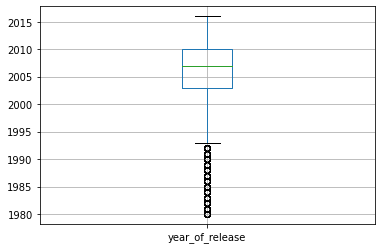

In [40]:
data.boxplot(column='year_of_release') # построим ящик с усами для столбца year_of_release
plt.show()

Посчитаем количество игр, которые выпускались в разные годы

In [41]:
data.groupby('year_of_release')['name'].count().sort_values(ascending=False)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

Т.к. некоторые игры вышли в один год на разные платформы. Поищем дубликаты по 2-м условиям: Название игры - Год выпуска
    <br> Перезапишем в новую переменную датасет без дублей и посмотрим реальное количество игр по годам

In [42]:
# сохраним в новую переменную индексы дубликатов по условиям Название игры - Год выпуска
duplicates_year_name = data.duplicated(subset=['name','year_of_release'])\
.loc[data.duplicated(subset=['name','year_of_release']) == True].index
print(duplicates_year_name)

Int64Index([   23,    35,    37,    41,    55,    57,    69,    99,   104,
              120,
            ...
            16660, 16672, 16673, 16690, 16691, 16692, 16709, 16710, 16713,
            16714],
           dtype='int64', length=4248)


In [43]:
# запишем в новую переменную датасет без дублей и посчитаем число игр в разрезе лет
data_year_name = data.drop(index=duplicates_year_name)
data_year_name.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,nothing,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,nothing,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,nothing,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,nothing,28.31


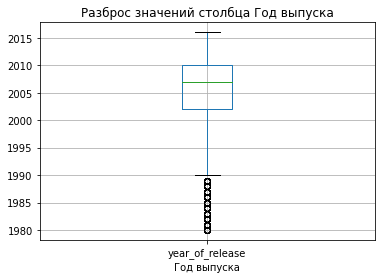

In [44]:
data_year_name.boxplot(column='year_of_release') # построим ящик с усами для столбца year_of_release

plt.title('Разброс значений столбца Год выпуска')
plt.xlabel('Год выпуска')
plt.show()

In [45]:
data_year_name.groupby('year_of_release')['name'].count().sort_values(ascending=False)

year_of_release
2008    1039
2009    1001
2010     900
2007     884
2011     779
2006     773
2005     657
2002     631
2004     550
2003     546
2012     446
2001     428
1998     364
2015     362
2013     335
1999     326
2000     325
2014     319
2016     297
1997     282
1996     258
1995     215
1994     117
1993      59
1981      46
1992      41
1991      40
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

БОльшая часть игр выпускалась в промежутке между 1994 и 2016 годами. Игры, выпускаемые перед 1994 годом можно не учитывать, т.к. они сильно устарели, и, наиболее вероятно, спрос на них будет низок

Построим график количества выпускаемых игр по годам

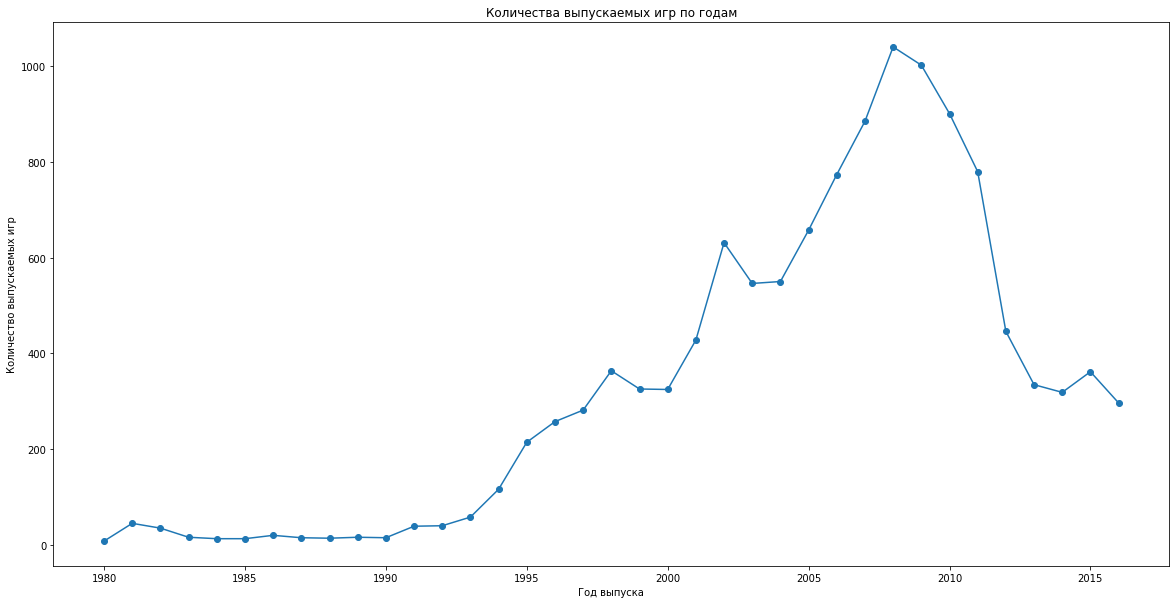

In [47]:
data_year_name.groupby('year_of_release')['name'].count().plot(figsize=(20,10), x="year_of_release",style="-o")
plt.title('Количества выпускаемых игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпускаемых игр')
plt.show()

По графику видно, что наблюдался с 2000 года наблюдался стремительный рост количества выпускаемых игр (несмотря на небольшое падение в 2004 и 2003 годах) вплоть до 2009 года. Это связано с большим распространением и доступностью новых платформ и, соответственно, с повышением спроса на игры, который, в свою очередь, увеличил предложение. Также, это связано с выходом новой версии Playstation 2, самой популярной платформы. <br>Затем, наблюдается постепенное снижение до 2016 года. Вероятно, это связано с перенасыщением рынка и постепенном внедрении регулирования содержания игр в разных странах.</br>

#### Анализ продаж платформ

Сгруппируем суммарные продажи по платформам

In [48]:
data_grouped_platform = data.groupby('platform')['sum'].sum().sort_values(ascending=False) # сгруппируем и отсортируем
data_grouped_platform

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum, dtype: float64

Выберем 7 платформ с наибольшими суммарными продажами

In [49]:
data_grouped_platform = data_grouped_platform.head(7).index # добавим в переменную индексы из группировки
data_grouped_platform

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4'], dtype='object', name='platform')

Посчитаем суммарные продажи для каждой платформы по годам.
Построим график

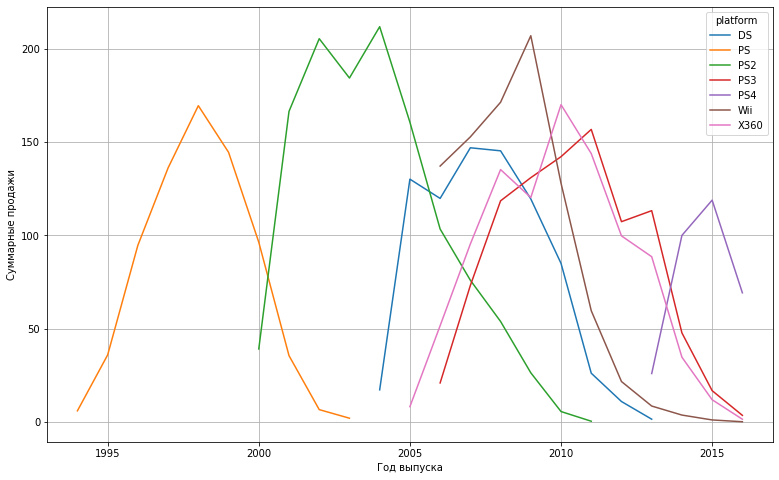

In [50]:
(
    data.query('platform in @data_grouped_platform')
    .pivot_table(index = 'year_of_release' , values = 'sum', columns = 'platform', aggfunc = 'sum')
    .plot(figsize=(13, 8), grid=True)
)
plt.xlim([1993,2017])
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.show()

Исходя из графика, можно сделать вывод о том, что, в среднем, старые платформы исчезают за период в районе 10 лет. Новые платформы PS появляются каждые 6 лет. Наибольшее количество продаж именно у этой линейки. Также, есть крупный конкурент XBOX

#### Определяем актуальный период

Определим минимальный порог продаж в 1 млн копий

In [51]:
data_actual = data.groupby(['platform', 'year_of_release'], as_index=False)['sum'].sum() #сгруппируем по платформе и году выпуска
# посчитаем для каждой платформы сумму продаж по каждому году, эта сумма должна быть больше 1
data_actual.head(20)

,platform,year_of_release,sum
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
5,2600,1985,0.45
6,2600,1986,0.67
7,2600,1987,1.94
8,2600,1988,0.74
9,2600,1989,0.63


Оставим только строки с суммой продаж выше 1 млн копий

In [52]:
data_actual = data_actual.query('sum >= 1')
data_actual.head(20)

,platform,year_of_release,sum
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
7,2600,1987,1.94
12,3DS,2011,63.20
13,3DS,2012,51.36
14,3DS,2013,56.57
15,3DS,2014,43.76
16,3DS,2015,27.78


Теперь посчитаем для каждой платформы количество строк

In [53]:
data_actual = data_actual.groupby('platform')['year_of_release'].count()
data_actual.head(10)

platform
2600     5
3DS      6
DC       4
DS      10
GB      13
GBA      7
GC       6
GEN      4
N64      6
NES     11
Name: year_of_release, dtype: int64

In [54]:
data_actual.mean() # определим среднее число таких лет. Это и будет среднее время жизни платформы

7.92

В итоге, актуальный период составит примерно половину времени среднего числа лет жизни платформы, т.к. половину жизненного цикла платформы продажи растут, а вторую половину падают

<b>Актуальный период с 2012 по 2016 года</b>

Перезапишем датафрейм с актуальным периодом анализа.

In [55]:
data = data.query('year_of_release >= 2012')
data = data.reset_index(drop=True)
data.head(10) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,nothing,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,nothing,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
5,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,nothing,11.68
8,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
9,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78,7.2,E,9.90


В результате исследования определили актуальный период  с 2012 по 2016 года. Т.к. большинство платформ, выпущенных ранее 2012 года уже неактуальны  и, продажи игр не будут расти.
Также, в 2013 году появилась очередная новая флагманская платформа playstation 4. Соответственно, можно предположить, что большинство игр будут выходить и продаваться именно на эту платформу, как это было с предыдущими версиями


#### Определение лидирующих платформ

Снова построим график с лидирующими платформами по продажам на актуальный период

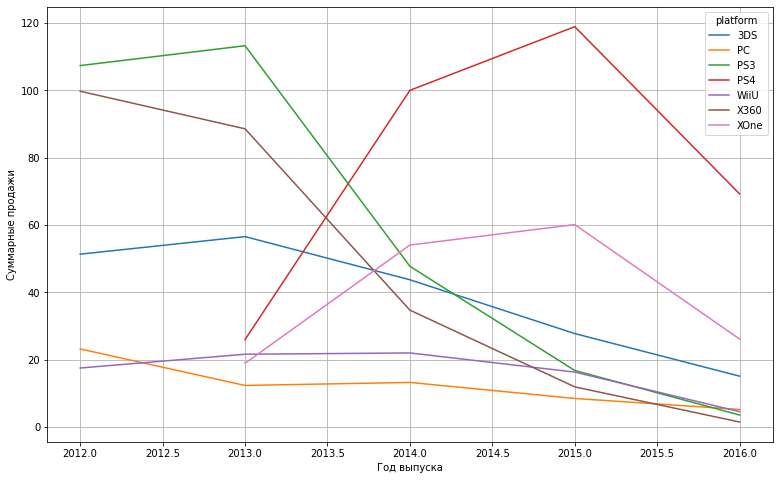

In [56]:
data_grouped_platform_new = data.groupby('platform')['sum'].sum().sort_values(ascending=False).head(7).index
(
    data.query('platform in @data_grouped_platform_new')
    .pivot_table(index = 'year_of_release' , values = 'sum', columns = 'platform', aggfunc = 'sum')
    .plot(figsize=(13, 8), grid=True)
)
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.show()

Исходя из графика, лидирующая по продажам платформа в 2016 годуу - PS4. У предыдущей версии PS3 росли продажи до 2013 года, как раз до того года, как вышла новая версия пплатформы.
<br> У всех платформ наблюдается спад продаж на 2016 год. Ps4 росла до 2015 и, затем, началось падение, также, как и XOne</br><br> WiiU росла до 2014 года и затем начала падать. </br>
<br> В целом, на всех платформах наблюдается спад на 2016 год, кроме PC </br>

In [57]:
data_grouped_new = data.groupby('platform')['sum'].sum().sort_values(ascending=False)
data_grouped_new

platform
PS4     314.14
PS3     288.78
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sum, dtype: float64

Можно выделить потенциально прибыльные платформы: PS4, PS3, X360, 3DS, XOne

#### Ящик с усами по продажам с  разбивкой по платформам

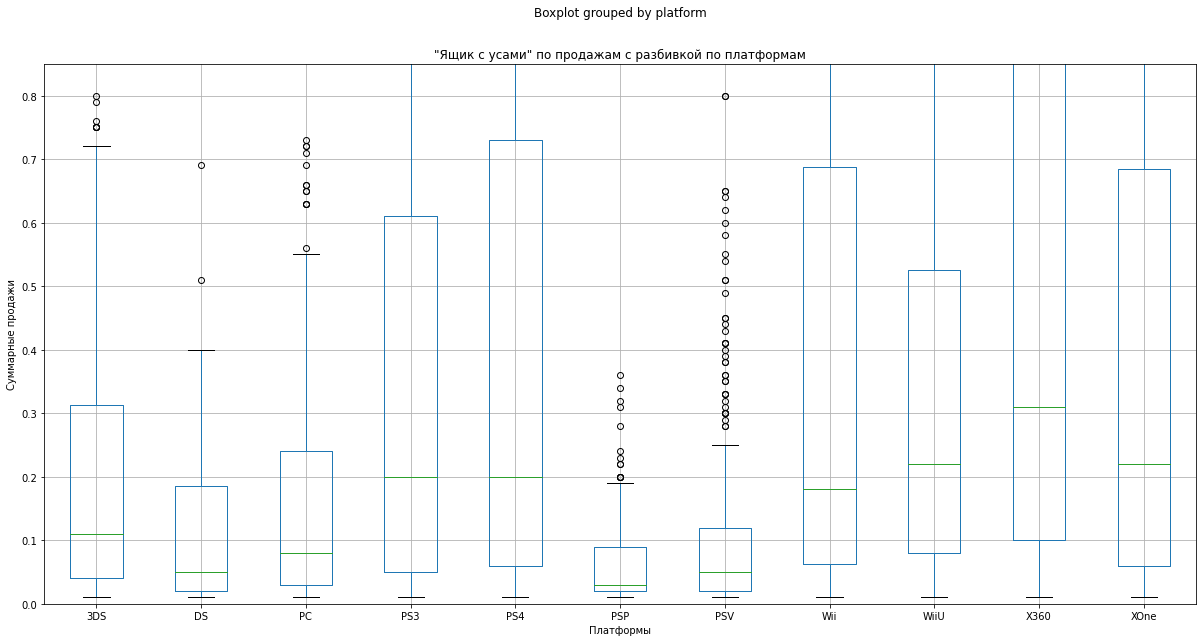

In [59]:
# построим график с суммарными продажами с разбивкой по платформам
data.boxplot(column=['sum'], by='platform', figsize=[20,10]) 
plt.ylim([0,0.85])
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')
plt.title('"Ящик с усами" по продажам с разбивкой по платформам')
plt.show()

На графике видно, что на всех платформах средний показатель продаж находится в промежутке между 0 и 0,5 млн копий. Самый большой разброс значений у X360  и у PS4. Самый маленький у PSP

#### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.

Рассчитаем коэффициент корреляции между продажами и отзывами пользователей и критиков.

In [60]:
data.query('platform == "PS4"').corr() # попарно выведем коэффициенты корреляции датасета для платформы PS4

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
sum,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


Видно, что коэффициент корреляции между отзывами игроков и продажами - <b> (-0.031957)</b>
<br>Коэффициент корреляции между отзывами критиков и продажами - <b> 0.406568</b></br>
<br> Можно сделать вывод, что наблюдается умеренная связь между отзывами критиков и продажами игр данной платформы. Наблюдается очень слабая связь и обратная зависимость между отзывами пользователей и общими продажами </br>

AxesSubplot(0.125,0.125;0.775x0.755)


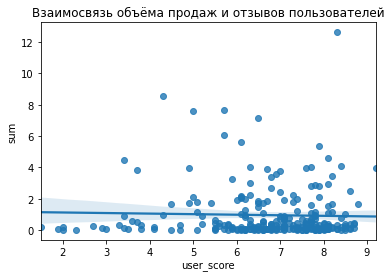

In [62]:
 # диаграмма рассения между продажами и отзывами пользователей
ax = seaborn.regplot(data=data.query('platform == "PS4"'), x='user_score', y='sum')
ax.set(title = 'Взаимосвязь объёма продаж и отзывов пользователей')
print(ax)

<AxesSubplot:xlabel='critic_score', ylabel='sum'>

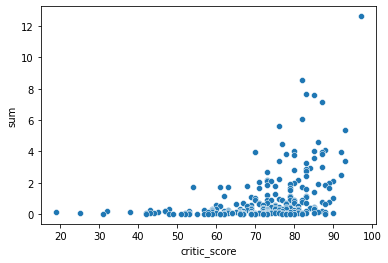

In [63]:
seaborn.scatterplot(data=data.query('platform == "PS4"'), x='critic_score', y='sum')

Наблюдается умеренная прямая связь между отзывами критиков и продажами игр данной платформы. Наблюдается очень слабая связь и обратная зависимость между отзывами пользователей и общими продажами. У оценок пользователей корреляции с продажами нет. 

#### Выводы по другим платформам

In [64]:
data.query('platform == "XOne"').corr() # попарно выведем коэффициенты корреляции датасета для платформы XOne

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum
year_of_release,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,0.063712,0.079481,-0.239183
na_sales,-0.242667,1.000000,0.765367,0.425725,0.988088,0.388636,-0.069318,0.970433
eu_sales,-0.194925,0.765367,1.000000,0.421071,0.852986,0.379162,-0.055911,0.898045
jp_sales,-0.127050,0.425725,0.421071,1.000000,0.441717,0.202954,0.069591,0.452701
other_sales,-0.243414,0.988088,0.852986,0.441717,1.000000,0.411825,-0.069645,0.995238
critic_score,0.063712,0.388636,0.379162,0.202954,0.411825,1.000000,0.472462,0.416998
user_score,0.079481,-0.069318,-0.055911,0.069591,-0.069645,0.472462,1.000000,-0.068925
sum,-0.239183,0.970433,0.898045,0.452701,0.995238,0.416998,-0.068925,1.000000


<AxesSubplot:xlabel='user_score', ylabel='sum'>

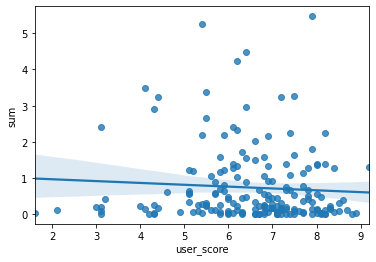

In [65]:
seaborn.regplot(data=data.query('platform == "XOne"'), x='user_score', y='sum') # отзывы пользователей и продажи

<AxesSubplot:xlabel='critic_score', ylabel='sum'>

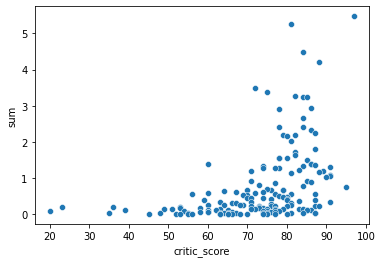

In [66]:
seaborn.scatterplot(data=data.query('platform == "XOne"'), x='critic_score', y='sum') # отзывы критиков и продажи

Снова наблюдается очень слабая обратная связь между отзывами пользователей игр на XBOX One и продажами. Но, присутствует прямая зависимость между отзывами критиков и продажами на данной платформе

In [67]:
data.query('platform == "PS3"').corr() # попарно выведем коэффициенты корреляции датасета для платформы PS3

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum
year_of_release,1.000000,-0.176077,-0.127386,-0.133988,-0.142844,-0.164502,-0.275460,-0.158896
na_sales,-0.176077,1.000000,0.842691,0.370621,0.896159,0.342992,-0.021661,0.939291
eu_sales,-0.127386,0.842691,1.000000,0.382731,0.981763,0.308144,-0.026407,0.970812
jp_sales,-0.133988,0.370621,0.382731,1.000000,0.393147,0.176326,0.179984,0.464062
other_sales,-0.142844,0.896159,0.981763,0.393147,1.000000,0.315136,-0.005069,0.985992
critic_score,-0.164502,0.342992,0.308144,0.176326,0.315136,1.000000,0.544510,0.334152
user_score,-0.275460,-0.021661,-0.026407,0.179984,-0.005069,0.544510,1.000000,-0.006206
sum,-0.158896,0.939291,0.970812,0.464062,0.985992,0.334152,-0.006206,1.000000


<AxesSubplot:xlabel='user_score', ylabel='sum'>

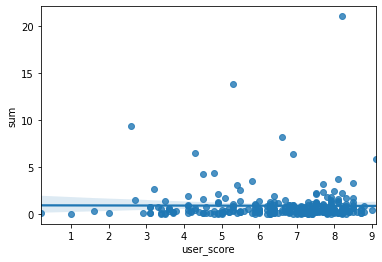

In [68]:
seaborn.regplot(data=data.query('platform == "PS3"'), x='user_score', y='sum') # отзывы пользователей и продажи

<AxesSubplot:xlabel='critic_score', ylabel='sum'>

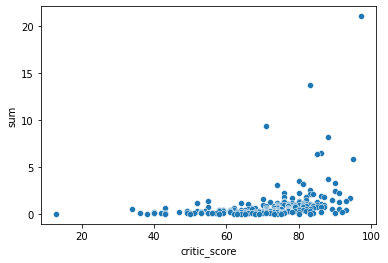

In [69]:
seaborn.scatterplot(data=data.query('platform == "PS3"'), x='critic_score', y='sum') # отзывы критиков и продажи

Снова наблюдается очень слабая обратная связь между отзывами пользователей игр на PS3 и продажами. Но, присутствует умеренная прямая зависимость между отзывами критиков и продажами на данной платформе

In [70]:
data.query('platform == "X360"').corr() # попарно выведем коэффициенты корреляции датасета для платформы X360

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum
year_of_release,1.000000,-0.145209,-0.145637,-0.324916,-0.141863,-0.179233,-0.263226,-0.151962
na_sales,-0.145209,1.000000,0.838446,0.524716,0.965031,0.342341,-0.000710,0.979361
eu_sales,-0.145637,0.838446,1.000000,0.526260,0.943203,0.354643,0.017297,0.931175
jp_sales,-0.324916,0.524716,0.526260,1.000000,0.540190,0.233093,0.095023,0.550276
other_sales,-0.141863,0.965031,0.943203,0.540190,1.000000,0.362118,0.001865,0.995453
critic_score,-0.179233,0.342341,0.354643,0.233093,0.362118,1.000000,0.557352,0.360573
user_score,-0.263226,-0.000710,0.017297,0.095023,0.001865,0.557352,1.000000,0.006164
sum,-0.151962,0.979361,0.931175,0.550276,0.995453,0.360573,0.006164,1.000000


<AxesSubplot:xlabel='user_score', ylabel='sum'>

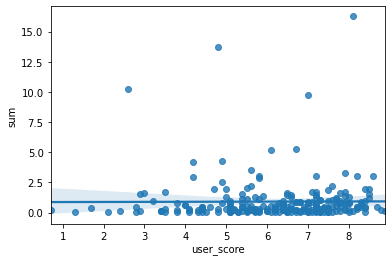

In [71]:
seaborn.regplot(data=data.query('platform == "X360"'), x='user_score', y='sum')

<AxesSubplot:xlabel='critic_score', ylabel='sum'>

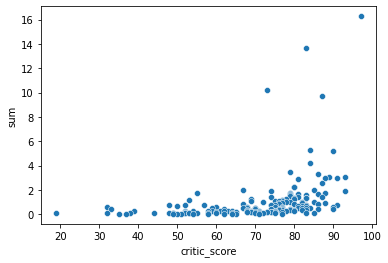

In [72]:
seaborn.scatterplot(data=data.query('platform == "X360"'), x='critic_score', y='sum')

Снова слабая связь между оценками пользователей и продажами, но, в данном случае, уже положительная. Также, прямая умеренная связь между оценками критиков и продажами

In [73]:
data.query('platform == "3DS"').corr() # попарно выведем коэффициенты корреляции датасета для платформы 3DS

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum
year_of_release,1.000000,-0.082787,-0.086559,-0.033883,-0.078176,-0.048492,0.090701,-0.071661
na_sales,-0.082787,1.000000,0.931508,0.666101,0.991136,0.328829,0.185631,0.939587
eu_sales,-0.086559,0.931508,1.000000,0.684292,0.963864,0.259721,0.118699,0.940331
jp_sales,-0.033883,0.666101,0.684292,1.000000,0.680866,0.307799,0.238252,0.868770
other_sales,-0.078176,0.991136,0.963864,0.680866,1.000000,0.309119,0.162372,0.951971
critic_score,-0.048492,0.328829,0.259721,0.307799,0.309119,1.000000,0.722762,0.320803
user_score,0.090701,0.185631,0.118699,0.238252,0.162372,0.722762,1.000000,0.197583
sum,-0.071661,0.939587,0.940331,0.868770,0.951971,0.320803,0.197583,1.000000


<AxesSubplot:xlabel='user_score', ylabel='sum'>

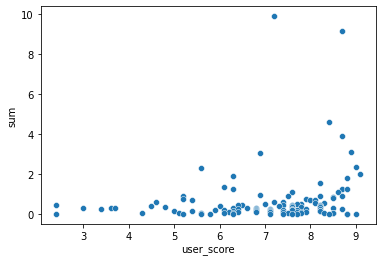

In [74]:
seaborn.scatterplot(data=data.query('platform == "3DS"'), x='user_score', y='sum')

<AxesSubplot:xlabel='critic_score', ylabel='sum'>

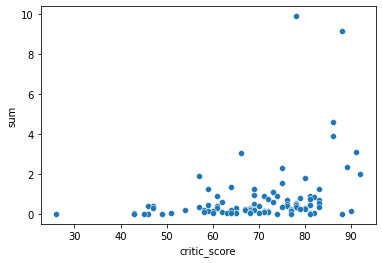

In [75]:
seaborn.scatterplot(data=data.query('platform == "3DS"'), x='critic_score', y='sum')

На платформе 3DS связь между отзывами пользователей и продажами сильнее, чем у других популярных платформ. Также, умеренная связь между оценками критиков и продажами

Исходя из вышеперечисленного, можно сделать вывод, что присутствует умеренная прямая связь между отзывами критиков и продажами игр данной платформы. Корреляция оценок пользователей с продажами не наблюдается. При планировании необходимо учитывать этот параметр . 

#### Самые прибыльные жанры

Сгруппируем общие продажи по жанрам и отсортируем по убыванию

Найдём медианные значения по продажам каждого жанра и определим какой жанр самый доходный 

In [77]:
data.groupby('genre')['sum'].median().sort_values(ascending=False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: sum, dtype: float64

Самый доходный жанр - Shooter с медианным значением 0.44 млн копий

#### Вывод:

Таким образом, в процессе исследовательского анализа, удалось выявить, что актуальный период выхода игр, необходимый для дальнейшего анализа начинается с 2012 года. Самые популярные платформы: PS4, PS3, XOne, XBOX, 3DS. С 2015 по 2016 год наблюалось падение продаж во всей индустрии игр. Вероятно, это связано с неактуальной выборкой данных, которая пополнится в начале 2017 года. Практически отстутствует зависимости между отзывами пользователей игр и продажами. Но, зато, присутствует зависимость (умеренная и прямая) между отзывами критиков и продажами. Самые прибыльные жанры игр Shooter и Sports. Данные факторы следует учитывать в дальнейшем планировании 

### Портрет пользователя в каждом регионе

#### Самые популярные платформы в разных регионах

Построим гистограммы для определения доли самых популярных платформ 

Гистограмма для региона NA

In [78]:
data_na = data.groupby('platform', as_index=False)['na_sales'].sum().sort_values(by='na_sales', ascending=False)
# сгруппируем по продажам каждой платформы и внесем в переменную data_na
data_na = data_na.reset_index(drop=True) # обновим индексы
data_na

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31
5,WiiU,38.10
6,PC,19.12
7,Wii,17.45
8,PSV,10.98
9,DS,4.59


Теперь, посчитаем долю для каждой платформы и внесём в новый столбец share

In [79]:
data_na['share'] = data_na['na_sales']/data_na['na_sales'].sum()
data_na

,platform,na_sales,share
0,X360,140.05,0.236983
1,PS4,108.74,0.184003
2,PS3,103.38,0.174933
3,XOne,93.12,0.157571
4,3DS,55.31,0.093592
5,WiiU,38.10,0.064470
6,PC,19.12,0.032354
7,Wii,17.45,0.029528
8,PSV,10.98,0.018580
9,DS,4.59,0.007767


Построим гистограмму для топ5 платформ

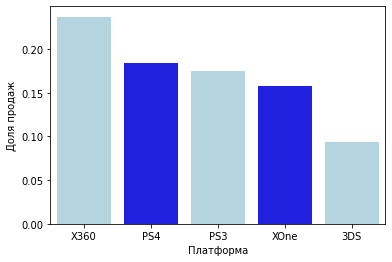

In [80]:
bar = seaborn.barplot(x='platform',
            y='share',
            data=data_na.head(5),
            palette=['lightblue', 'blue'])

bar.set(xlabel='Платформа', ylabel='Доля продаж');

На диаграмме видно, что самая большая доля продаж в NA у X360 - 23.7%. Затем идет PS4 - 18,4%. PS3 - 17,5%

Гистограмма для EU региона

In [81]:
data_eu = data.groupby('platform', as_index=False)['eu_sales'].sum().sort_values(by='eu_sales', ascending=False)
# сгруппируем по продажам каждой платформы и внесем в переменную data_eu
data_eu = data_eu.reset_index(drop=True) # обновим индексы
data_eu

,platform,eu_sales
0,PS4,141.09
1,PS3,106.85
2,X360,74.52
3,XOne,51.59
4,3DS,42.64
5,PC,37.76
6,WiiU,25.13
7,Wii,11.92
8,PSV,11.36
9,DS,3.53


In [82]:
data_eu['share'] = data_eu['eu_sales']/data_eu['eu_sales'].sum()
data_eu

,platform,eu_sales,share
0,PS4,141.09,0.278388
1,PS3,106.85,0.210829
2,X360,74.52,0.147037
3,XOne,51.59,0.101794
4,3DS,42.64,0.084134
5,PC,37.76,0.074505
6,WiiU,25.13,0.049585
7,Wii,11.92,0.023520
8,PSV,11.36,0.022415
9,DS,3.53,0.006965


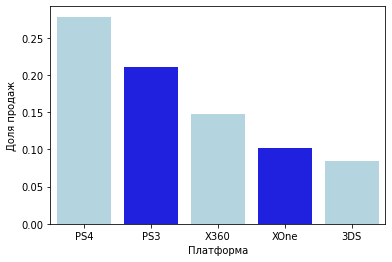

In [83]:
bar = seaborn.barplot(x='platform',
            y='share',
            data=data_eu.head(5),
            palette=['lightblue', 'blue'])

bar.set(xlabel='Платформа', ylabel='Доля продаж');

В Европе абсолютное лидерство имеют платформы от SONY - PS4 и PS3 - 27.8% и 21% соответственно. Затем, идут платформы от Microsoft - X360 и XOne - 14.7% и 10.1% соответственно. Замыкает пятерку (также, как и в NA регионе) - 3DS, 8.4%

Гистограмма для JP региона

In [84]:
data_jp = data.groupby('platform', as_index=False)['jp_sales'].sum().sort_values(by='jp_sales', ascending=False)
# сгруппируем по продажам каждой платформы и внесем в переменную data_eu
data_jp = data_jp.reset_index(drop=True) # обновим индексы
data_jp

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01
5,PSP,10.47
6,DS,3.72
7,Wii,3.39
8,X360,1.57
9,XOne,0.34


In [85]:
data_jp['share'] = data_jp['jp_sales']/data_jp['jp_sales'].sum()
data_jp

,platform,jp_sales,share
0,3DS,87.79,0.455862
1,PS3,35.29,0.183249
2,PSV,21.04,0.109253
3,PS4,15.96,0.082875
4,WiiU,13.01,0.067556
5,PSP,10.47,0.054367
6,DS,3.72,0.019317
7,Wii,3.39,0.017603
8,X360,1.57,0.008152
9,XOne,0.34,0.001766


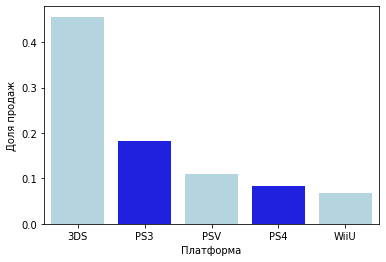

In [86]:
bar = seaborn.barplot(x='platform',
            y='share',
            data=data_jp.head(5),
            palette=['lightblue', 'blue'])

bar.set(xlabel='Платформа', ylabel='Доля продаж');

В Японии заметное лидерство удерживает приставка от Nintendo 3DS - 45.6%. С большим отрывом на втором месте Ps3 - 18.3%. Затем, PSV - 10.1%. PS4 - 8.3%. Замыкает пятерку WiiU - 6.8%.
<br> Можно обратить внимание, что в Японии заметно отличается распределение ТОП5 платформ по продажам </br>

#### Самые популярные жанры

Построим гистограммы для определения доли самых популярных жанров

Гистограмма для NA региона

In [87]:
data_na_genre = data.groupby('genre', as_index=False)['na_sales'].sum().sort_values(by='na_sales', ascending=False)
# сгруппируем по продажам каждой платформы и внесем в переменную data_na_genre
data_na_genre = data_na_genre.reset_index(drop=True) # обновим индексы
data_na_genre

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19
5,Platform,25.38
6,Fighting,19.79
7,Racing,17.22
8,Adventure,8.92
9,Simulation,7.97


In [88]:
data_na_genre['share'] = data_na_genre['na_sales']/data_na_genre['na_sales'].sum()
data_na_genre

,genre,na_sales,share
0,Action,177.84,0.300929
1,Shooter,144.77,0.244970
2,Sports,81.53,0.137960
3,Role-Playing,64.00,0.108297
4,Misc,38.19,0.064623
5,Platform,25.38,0.042946
6,Fighting,19.79,0.033487
7,Racing,17.22,0.029139
8,Adventure,8.92,0.015094
9,Simulation,7.97,0.013486


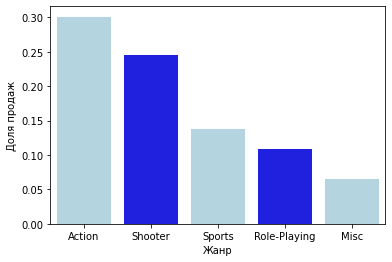

In [89]:
bar = seaborn.barplot(x='genre',
            y='share',
            data=data_na_genre.head(5),
            palette=['lightblue', 'blue'])

bar.set(xlabel='Жанр', ylabel='Доля продаж');

Исходя из данных, можно сделать вывод, что самым популярным жанром является Action - 30% всех продаж. Затем, идёт жанр Shooter - 24.5%. Sports - 13.8%. Role-Playing - 10.8%. Замыкает пятёрку Misc - 6.5%. 

Гистограмма для EU региона

In [90]:
data_eu_genre = data.groupby('genre', as_index=False)['eu_sales'].sum().sort_values(by='eu_sales', ascending=False)
# сгруппируем по продажам каждой платформы и внесем в переменную data_na_genre
data_eu_genre = data_eu_genre.reset_index(drop=True) # обновим индексы
data_eu_genre

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.08
3,Role-Playing,48.53
4,Racing,27.29
5,Misc,26.32
6,Platform,21.41
7,Simulation,14.55
8,Fighting,10.79
9,Adventure,9.46


In [91]:
data_eu_genre['share'] = data_eu_genre['eu_sales']/data_eu_genre['eu_sales'].sum()
data_eu_genre

,genre,eu_sales,share
0,Action,159.34,0.314398
1,Shooter,113.47,0.223891
2,Sports,69.08,0.136304
3,Role-Playing,48.53,0.095756
4,Racing,27.29,0.053847
5,Misc,26.32,0.051933
6,Platform,21.41,0.042245
7,Simulation,14.55,0.028709
8,Fighting,10.79,0.021290
9,Adventure,9.46,0.018666


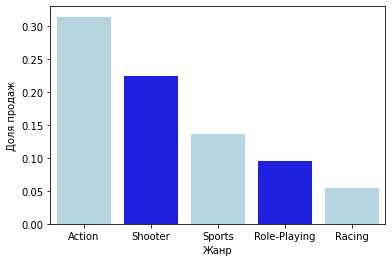

In [92]:
bar = seaborn.barplot(x='genre',
            y='share',
            data=data_eu_genre.head(5),
            palette=['lightblue', 'blue'])

bar.set(xlabel='Жанр', ylabel='Доля продаж');

Также, как и в NA регионе лидируют Action и Shooter - 31.5% и 22.4% соответственно. Далее, жанр Sports - 13.6%. Role-Playing - 9.6%. Замыкает пятерку жанр Racing - 5.4%

Гистограмма для JP региона

In [93]:
data_jp_genre = data.groupby('genre', as_index=False)['jp_sales'].sum().sort_values(by='jp_sales', ascending=False)
# сгруппируем по продажам каждой платформы и внесем в переменную data_jp_genre
data_jp_genre = data_jp_genre.reset_index(drop=True) # обновим индексы
data_jp_genre

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44
5,Shooter,9.23
6,Platform,8.63
7,Adventure,8.24
8,Sports,8.01
9,Strategy,2.88


In [94]:
data_jp_genre['share'] = data_jp_genre['jp_sales']/data_jp_genre['jp_sales'].sum()
data_jp_genre

,genre,jp_sales,share
0,Role-Playing,65.44,0.339807
1,Action,52.80,0.274172
2,Misc,12.86,0.066777
3,Simulation,10.41,0.054055
4,Fighting,9.44,0.049019
5,Shooter,9.23,0.047928
6,Platform,8.63,0.044813
7,Adventure,8.24,0.042787
8,Sports,8.01,0.041593
9,Strategy,2.88,0.014955


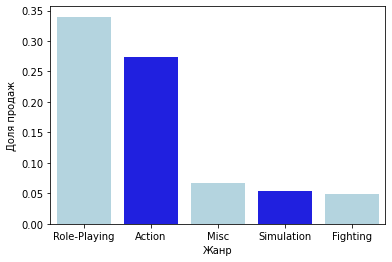

In [95]:
bar = seaborn.barplot(x='genre',
            y='share',
            data=data_jp_genre.head(5),
            palette=['lightblue', 'blue'])

bar.set(xlabel='Жанр', ylabel='Доля продаж');

Можно обратить внимание, что распределение по жанрам в Японии, также, заметно отличаются от остальных регионов. Первое место занимает - Role-Playing - 34%. Далее, идёт Action - 27.4%. Эти два жанра в совокупности представляют более 60% рынка. Далее, идёт Misc - 6.7%, Simulation - 5.4%, Fighting - 4.9%

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [97]:
# группировка по NA региону и рейтингу
data_rating = data.groupby('rating', as_index=False)['na_sales'].sum() 
# обновим индексы
data_rating = data_rating.reset_index(drop=True) 
data_rating

,rating,na_sales
0,E,114.37
1,E10+,75.70
2,M,231.57
3,T,66.02
4,nothing,103.31


Построим круговую диаграмму для NA региона

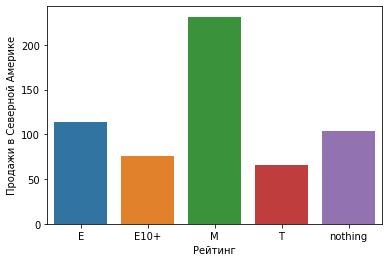

In [99]:
bar = seaborn.barplot(x='rating',
            y='na_sales',
            data=data_rating)

bar.set(xlabel='Рейтинг', ylabel='Продажи в Северной Америке');

Рассчитаем долю рынка для каждого рейтинга

In [100]:
data_rating['share'] = data_rating['na_sales']/data_rating['na_sales'].sum()
data_rating

,rating,na_sales,share
0,E,114.37,0.193529
1,E10+,75.70,0.128094
2,M,231.57,0.391847
3,T,66.02,0.111715
4,nothing,103.31,0.174814


В регионе NA наибольшие продажи у игр с рейтингом M (mature), для 17+ подростков и взрослых - 39.2% продаж. Далее, идёт рейтинг Е (everyone). рейтинг для всех возрастов - 19.3%. E10+, рейтинг для детей возрастом 10+ - 12.8%, и последнее место у рейтинга T (teen), игры подходящие для подростов старше 13 лет - 11.2%. Игры без рейтинга - 17.5% 

In [101]:
data_rating_eu = data.groupby('rating', as_index=False)['eu_sales'].sum() # группировка по EU региону и рейтингу
data_rating_eu = data_rating_eu.reset_index(drop=True) # обновим индексы
data_rating_eu

,rating,eu_sales
0,E,113.02
1,E10+,55.37
2,M,193.96
3,T,52.96
4,nothing,91.50


In [103]:
# группировка по EU региону и рейтингу
data_rating_eu = data.groupby('rating', as_index=False)['eu_sales'].sum() 
# обновим индексы
data_rating_eu = data_rating_eu.reset_index(drop=True) 
data_rating_eu

,rating,eu_sales
0,E,113.02
1,E10+,55.37
2,M,193.96
3,T,52.96
4,nothing,91.50


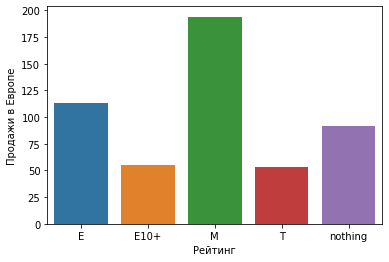

In [104]:
bar = seaborn.barplot(x='rating',
            y='eu_sales',
            data=data_rating_eu)

bar.set(xlabel='Рейтинг', ylabel='Продажи в Европе');

In [105]:
data_rating_eu['share'] = data_rating_eu['eu_sales']/data_rating_eu['eu_sales'].sum()
data_rating_eu

,rating,eu_sales,share
0,E,113.02,0.223003
1,E10+,55.37,0.109252
2,M,193.96,0.382708
3,T,52.96,0.104497
4,nothing,91.50,0.180541


 <font color='4682B4'>В EU регионе распределение по рейтингу аналогичное:
    <br> 1) M - 38.3%;</br>
    <br>2) E- 22.3%;</br>
    <br>3) Без рейтинга - 18%</br>
    <br>4) E10+ - 10.9%;</br>
    <br>4) T - 10.5%.</font>


In [108]:
# группировка по EU региону и рейтингу
data_rating_jp = data.groupby('rating', as_index=False)['jp_sales'].sum() 
# обновим индексы
data_rating_jp = data_rating_jp.reset_index(drop=True) 
data_rating_jp

,rating,jp_sales
0,E,28.33
1,E10+,8.19
2,M,21.20
3,T,26.02
4,nothing,108.84


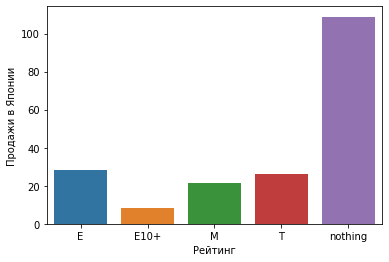

In [109]:
bar = seaborn.barplot(x='rating',
            y='jp_sales',
            data=data_rating_jp)

bar.set(xlabel='Рейтинг', ylabel='Продажи в Японии');

In [110]:
data_rating_jp['share'] = data_rating_jp['jp_sales']/data_rating_jp['jp_sales'].sum()
data_rating_jp

,rating,jp_sales,share
0,E,28.33,0.147108
1,E10+,8.19,0.042528
2,M,21.20,0.110084
3,T,26.02,0.135113
4,nothing,108.84,0.565168


В Японии распределение продаж по рейтингу совсем иное.
Больше всего игр проданных игр не имеют рейтинга. Далее, рейтинг Е - 14.7%. Рейтинг T - 13.5%. Рейтинг M - 11% И последнее место у рейтинга E10+ - 4.2%.

Основная причина того, что в Японии лидерами продаж являются игры без рейтинга является то, что в разных странах представлены разные рейтинговые модели: американская ESRB, японская CERO. Японская модель включает в себя оценки: А («для всех возрастов»), B («старше 12»), С («старше 15») и Z («от 18 и выше»), D («от 17 и выше»). Т.к. в датасете представлен только рейтинг ESRB можно сделать вывод, что не все игры, которые продавались в Японии имеют рейтинг ESRB, но, вероятно, имеют рейтинг CERO.

#### Вывод:

Было определено, что разница в продажах платформ несущественная у 2-х регионов - Северной Америки и Европы. Топ5 самый популярных платформ занимают одни и те же приставки. Разница между этими регионами и Японией  наиболее существенна. Это выражено в иных предпочтениях в видеоиграх и в разных рейтинговых моделях.
<br> Самые популярные жанры у Европы и Северной Америки - Action и Shooter.</br>
<br> Явно выраженный самый продаваемый рейтинг на западе - M - игры, предназначенные для взрослых. Япония отличается и здесь. Игры без рейтинга ESRB имеют лидерство по продажам. 

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы.
<br> Нулева гипотеза состоит в том, что средние пользовательские рейтинги равны. Альтернативная состоит в том, что рейтинги неравны </br>

```
H_0: Средний пользовательский рейтинг платформы XBOX One  = Средний пользовательский рейтинг платформы PC`
H_1: Средний пользовательский рейтинг платформы XBOX One  ≠ Средний пользовательский рейтинг платформы PC`
alpha = 0.05
```

In [112]:
good_data = data[data['user_score'].isna() != True ] # удаляем строки с пропусками оценок пользователей
# т.к. статистические анализы выводят ошибку при пропусках
good_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
5,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
8,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
9,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78,7.2,E,9.90
10,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87,7.0,M,9.71
11,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.6,M,9.36
13,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88,8.7,E,9.17


Задача состоит в том, что необходимо сравнить средние показатели, для проверки гипотез возьмём ttest_ind

In [113]:
user_score_average_xone = good_data[good_data['platform'] =='XOne']['user_score']
user_score_average_pc = good_data[good_data['platform'] =='PC']['user_score']
results = st.ttest_ind(user_score_average_xone, user_score_average_pc, equal_var = False)
    # results = вызов метода для проверки гипотезы

alpha = .05 # alpha = 0.05

print(results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") # условный оператор с выводом строки с ответом

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулева гипотеза состоит в том, что средние пользовательские рейтинги равны. Альтернативная состоит в том, что рейтинги неравны

```
H_0: Средний пользовательский рейтинг жанра Action  = Средний пользовательский рейтинг жанра Sports
H_1: Средний пользовательский рейтинг жанра Action  ≠ Средний пользовательский рейтинг жанра Sports
alpha = 0.05
```

Здесь снова необходимы средние показатели, можно воспользоваться методом ttest_ind

In [114]:
user_score_average_action = good_data[good_data['genre'] =='Action']['user_score']
user_score_average_sports = good_data[good_data['genre'] =='Sports']['user_score']
results = st.ttest_ind(user_score_average_action, user_score_average_sports, equal_var = False)
    # results = вызов метода для проверки гипотезы

alpha = .05 # alpha = 0.05

print(results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") # условный оператор с выводом строки с ответом

5.989458066467418e-20
Отвергаем нулевую гипотезу


#### Вывод:

Таким образом, не удалось отвергнуть гипотезу, что средний пользовательский рейтинг платформы XBOX One  равен среднему пользовательскому рейтину платформы PC.
<br> Но, удалось отвергнуть, что средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports. Значит, эти показатели разные </br>

### Общий вывод

Было проведено исследование  закономерностей успешности компьютерных игр для Интернет-магазина «Стримчик»
    <br> Данные - Из открытых источников были взяты исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы с целью определения закономерностей и, исходя из этого, планирования кампании на 2017 год. <br/>
    <br> В процессе исследования были определены основные показателя для дальнейшего планировния: 
    <br> - определён актуальный период анализа - 2012-2016 гг;<br/>
    <br> - определены лидирующие платформы по продажам - PS4, PS3, X360, 3DS, XOne;<br/> 
    <br> - определена корреляция между продажами и отзывами игроков/критиков внутри каждой из популярных платформ:
        <br><b>PS4:</b> Коэффициент корреляции между отзывами игроков и продажами - (-0.031957).
Коэффициент корреляции между отзывами критиков и продажами - 0.406568.
Наблюдалась умеренная связь между отзывами критиков и продажами игр данной платформы. Наблюдалась очень слабая связь и обратная зависимость между отзывами пользователей и общими продажами;<br/>
        <br><b>XOne:</b> Коэффициент корреляции между отзывами игроков и продажами - (-0.068925).
Коэффициент корреляции между отзывами критиков и продажами - 0.416998. Также, наблюдалась умеренная связь между отзывами критиков и продажами игр данной платформы. Наблюдалась очень слабая связь и обратная зависимость между отзывами пользователей и общими продажами.</br>
    <br><b>PS3:</b> Коэффициент корреляции между отзывами игроков и продажами - (-0.006206).
Коэффициент корреляции между отзывами критиков и продажами - 0.334152. Аналогичная ситуация как и с другими платформами.</br>
<br><b>X360:</b> Коэффициент корреляции между отзывами игроков и продажами - 0.006164. Коэффициент корреляции между отзывами критиков и продажами - 0.416998. Наблюдалась очень слабая связь и <b>прямая</b> зависимость между отзывами пользователей и общими продажами. Наблюдалась умеренная связь между отзывами критиков и продажами игр данной платформы.</br> 
    <br> - были определены самые прибыльные жанры: 
    <br>Жанр <b>Shooter</b> с медианным значением 440 тыс. копий</br>
<br>Жанр <b>Sports</b> с медианным значением 240 тыс. копий</br>
<br>Жанр <b>Platform</b> с медианным значением 210 тыс. копий</br>
<br> Самый неприбыльный жанр - <b>Adventure</b> с медианным значением 30 тыс. копий</br>
       <br>Установлены самые популярные платформы для разных регионов: </br>
      <br>Cамая большая доля продаж в Северной Америке у X360 - 23.7%. Затем идет PS4 - 18,4%. PS3 - 17,5%</br>
      <br> Cамая большая доля продаж в Европе у PS4 и PS3 - 27.8% и 21% соответственно. Затем, идут платформы от Microsoft - X360 и XOne - 14.7% и 10.1% соответственно.</br>
      <br>Cамая большая доля продаж в Японии Nintendo 3DS - 45.6%. С большим отрывом на втором месте Ps3 - 18.3%. Затем, PSV - 10.1%. PS4 - 8.3%. </br>
      <br>Установлены самые популярные жанры для разных регионов:</br>
      <br>- Action и Shooter в Европе и Северной Америке (более 50% для обоих жанров)</br>
      <br>- Role-Playing и Action в Японии (34%, 27.4% соответственно)</br>
      <br> Было установлено влияние рейтинга ESRB на продажи в Северной Америке и Европе (игроки больше покупают игры с рейтингом M(mature 17+) - 38-39% всех продаж. В Японии выстроить объективную картина о распределении не удалось, т.к. в стране присутствует другая рейтинговая модель. По причине того, что в Японии очень развит геймдев, значительное число игр популярных японских игр просто не получили рейтинг ESRB, но, вероятно, имеют рейтинг CERO  </br>
     <br> В процессе исследования были выдвинуты 2 гипотезы:</br>
     <br> 1) cредние пользовательские рейтинги платформ Xbox One и PC одинаковые</br>
     <br> В процессе статистического анализа опровергнуть, что средний пользовательский рейтинг платформы XBOX One  = средний пользовательский рейтинг платформы PC не удалось.</br>
     <br> 2) cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные </br>
     </br>В процессе статистического анализа удалось опровергнуть, что Средний пользовательский рейтинг жанра Action  = Средний пользовательский рейтинг жанра Sports.
    <br> Рекомендации:</br>
    <br> Следуют обратить особое внимание на игры жанров Shooter и Sports, т.к. они являются самыми прибыльными жанрами. Также, следует идти в ногу со временем и большую часть игр представить на новых платформах (PS4, XOne). Но, не стоит забывать и о PS3 и X360, т.к. старые игроки еще не все перешли на новые версии платформ. 
    <br> Для более точного вывода по японскому региону, следует найти и добавить информацию о рейтинге CERO и провести дополнительный анализ.</br>
    <br> Необходимы отслеживать отзывы критиков игр, т.к. это может влиять на мнение пользователей и, соответственно, на продажи. </br>
    